# Examen Final - Procesamiento de Imágenes en Python

## Punto 1: Procesamiento de Imágenes de Animal en Vía de Extinción

Este notebook realiza procesamiento de imágenes sobre una fotografía de un animal en peligro de extinción, aplicando diferentes técnicas de procesamiento digital de imágenes.

**Contenido:**
1. Carga y visualización de imagen RGB
2. Aplicación de filtros básicos (suavizado y realce de bordes)
3. Visualización de canales de color RGB
4. Operaciones morfológicas
5. Generación de animación GIF

## 1. Importación de Librerías

Importamos las bibliotecas necesarias para el procesamiento de imágenes.

In [2]:
import subprocess
import sys

# Instalar las librerías necesarias

packages = ['opencv-python', 'pillow', 'numpy', 'matplotlib']

for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("✓ Todas las librerías han sido instaladas correctamente")

✓ Todas las librerías han sido instaladas correctamente


In [3]:
# Importación de librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Configuración de matplotlib para mostrar imágenes más grandes
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("Librerías importadas correctamente")

Matplotlib is building the font cache; this may take a moment.


Librerías importadas correctamente


## 2. Carga y Visualización de Imagen RGB

Cargamos una imagen de un animal en vía de extinción (tigre de Bengala) y la mostramos en su forma original.


✓ Imagen cargada correctamente desde data/animal_extincion.jpg


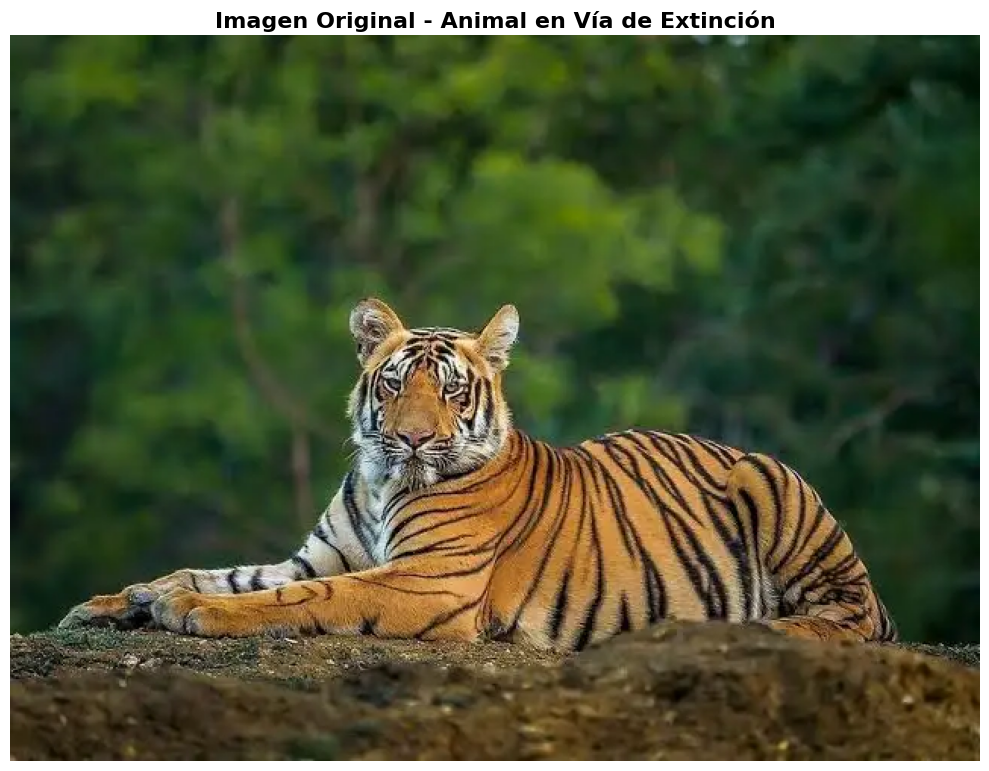

Dimensiones de la imagen: 640x479 píxeles
Número de canales: 3


In [4]:
# Cargar la imagen
# OpenCV carga en formato BGR, así que la convertimos a RGB
image_path = 'data/animal_extincion.jpg'

# Verificar si la imagen existe
if not os.path.exists(image_path):
    print(f"⚠️ ADVERTENCIA: No se encuentra la imagen en {image_path}")
    print("Por favor, descarga una imagen de un animal en extinción y guárdala como 'data/animal_extincion.jpg'")
    # Crear una imagen de ejemplo para demostración
    img_bgr = np.random.randint(0, 255, (400, 600, 3), dtype=np.uint8)
    print("Se ha creado una imagen de ejemplo para demostración")
else:
    img_bgr = cv2.imread(image_path)
    print(f"✓ Imagen cargada correctamente desde {image_path}")

# Convertir de BGR a RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Imagen Original - Animal en Vía de Extinción', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Dimensiones de la imagen: {img_rgb.shape[1]}x{img_rgb.shape[0]} píxeles")
print(f"Número de canales: {img_rgb.shape[2]}")

## 3. Aplicación de Filtros Básicos

### 3.1 Filtro de Suavizado (Desenfoque)

Aplicamos un filtro Gaussiano para suavizar la imagen y reducir el ruido.

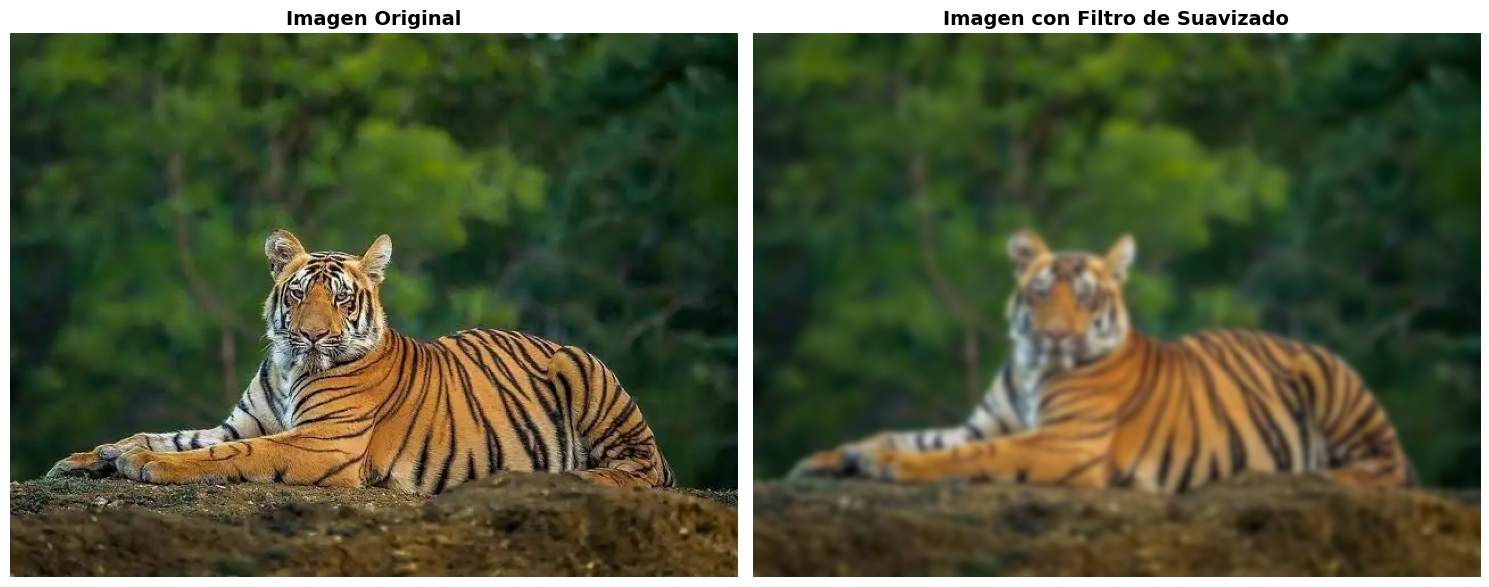

 Efecto visual observado:
El filtro de suavizado reduce el ruido y los detalles finos de la imagen.
Los bordes se vuelven más suaves y la imagen tiene una apariencia más 'difuminada'.
Esto es útil para eliminar artefactos y preparar la imagen para otros procesamientos.


In [12]:
# Aplicar filtro de suavizado Gaussiano
# Kernel size (15, 15) - valores más grandes = más desenfoque
img_blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)

# Mostrar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_blurred)
axes[1].set_title('Imagen con Filtro de Suavizado', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(" Efecto visual observado:")
print("El filtro de suavizado reduce el ruido y los detalles finos de la imagen.")
print("Los bordes se vuelven más suaves y la imagen tiene una apariencia más 'difuminada'.")
print("Esto es útil para eliminar artefactos y preparar la imagen para otros procesamientos.")

### 3.2 Filtro de Realce de Bordes

Aplicamos el detector de bordes Canny para resaltar los contornos y bordes en la imagen.

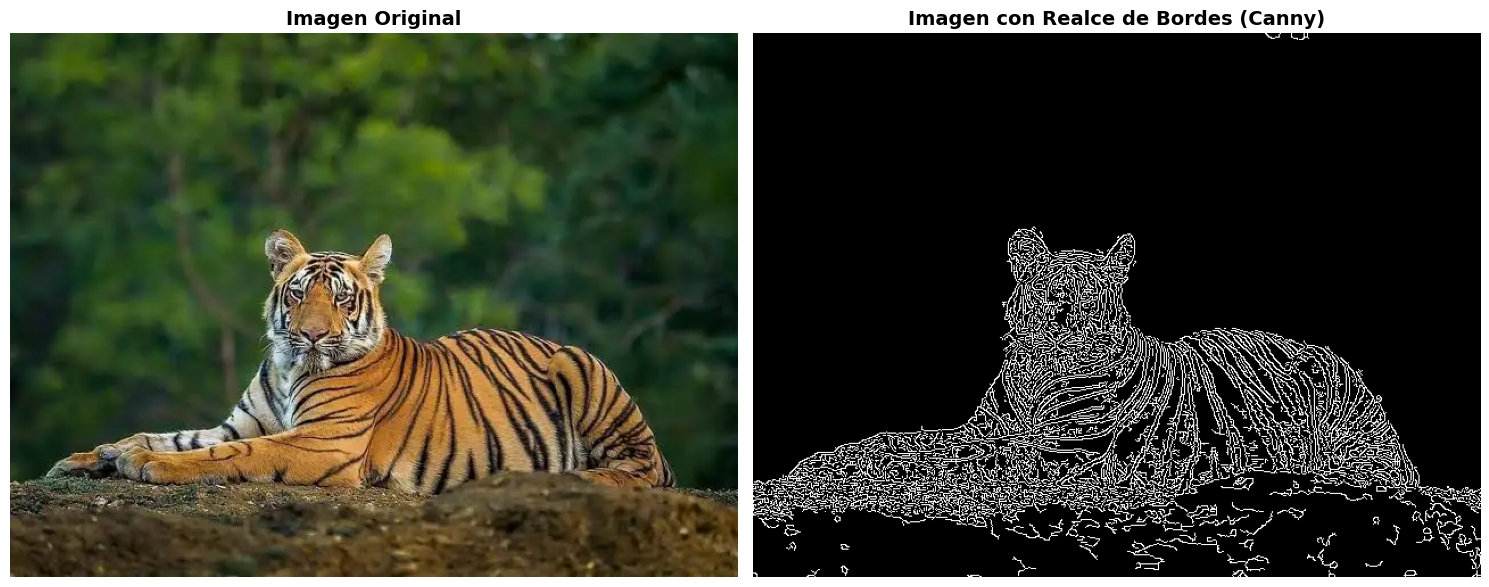

 Efecto visual observado:
El filtro de realce de bordes (Canny) detecta y resalta los contornos principales del animal.
Los bordes aparecen como líneas blancas sobre fondo negro, destacando la silueta y características
distintivas como ojos, nariz, orejas y patrones del pelaje.
Este filtro es excelente para análisis de formas y detección de objetos.


In [13]:
# Convertir a escala de grises para aplicar Canny
img_gray_temp = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar detector de bordes Canny
# Parámetros: imagen, umbral mínimo, umbral máximo
img_edges = cv2.Canny(img_gray_temp, 50, 150)

# Mostrar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_edges, cmap='gray')
axes[1].set_title('Imagen con Realce de Bordes (Canny)', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(" Efecto visual observado:")
print("El filtro de realce de bordes (Canny) detecta y resalta los contornos principales del animal.")
print("Los bordes aparecen como líneas blancas sobre fondo negro, destacando la silueta y características")
print("distintivas como ojos, nariz, orejas y patrones del pelaje.")
print("Este filtro es excelente para análisis de formas y detección de objetos.")

## 4. Visualización de Canales de Color

Separamos la imagen RGB en sus tres canales individuales (Rojo, Verde, Azul) y los mostramos en escala de grises.

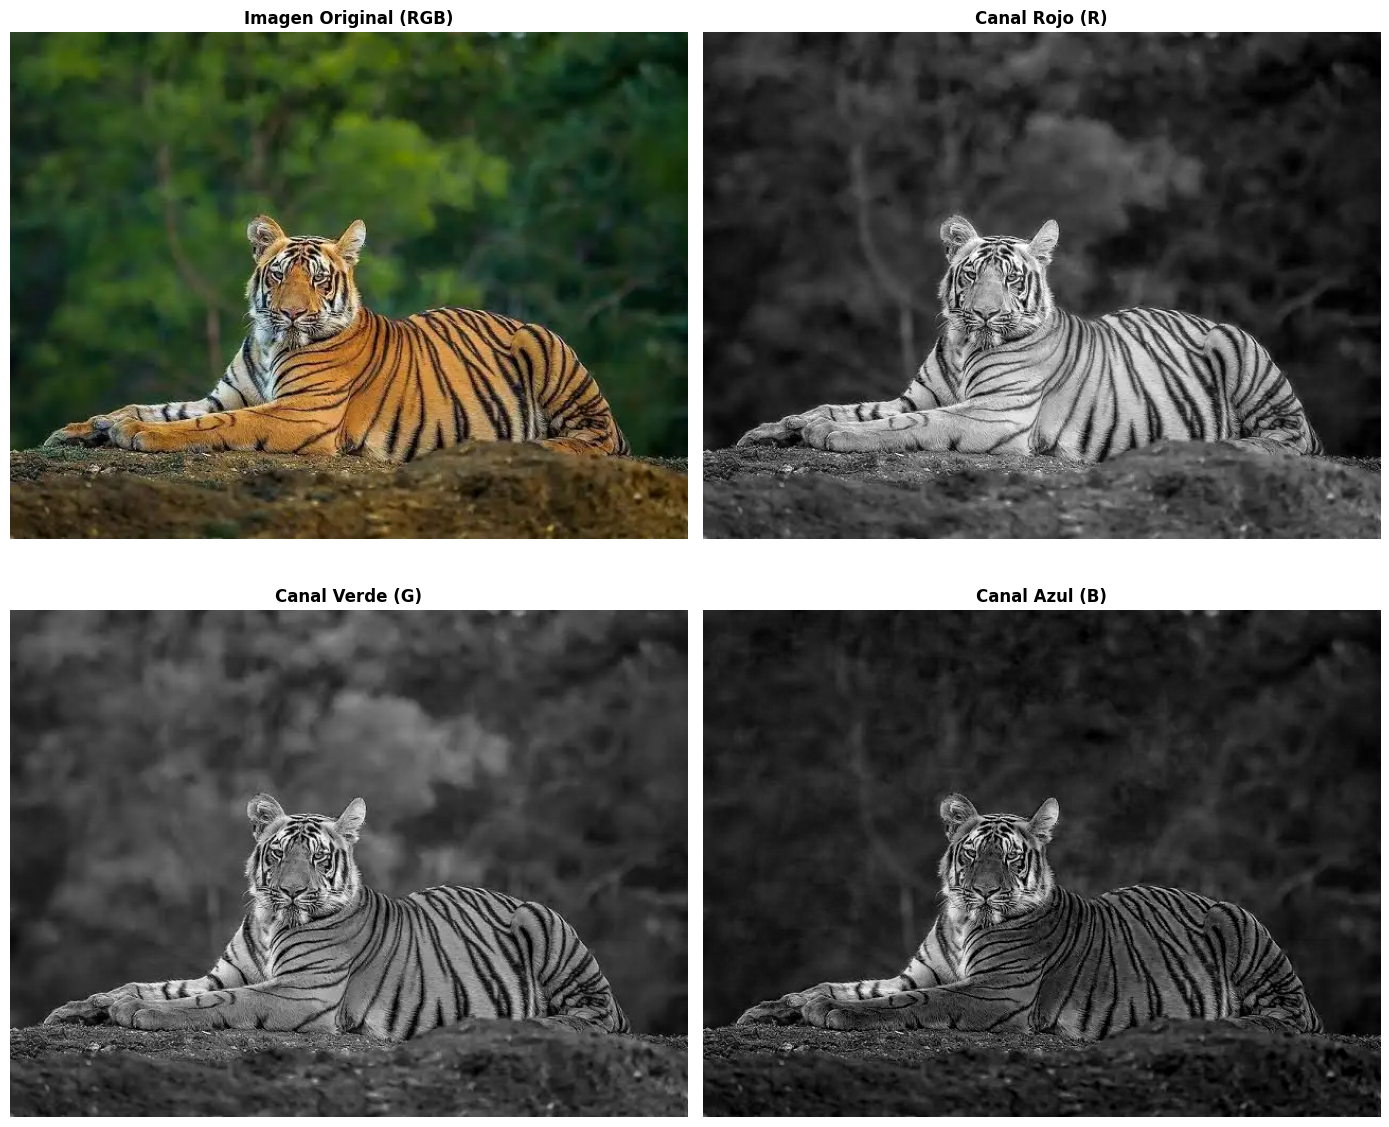

 Análisis de los canales de color:

 CANAL ROJO (R):
   - Las áreas con tonos naranjas/rojos del pelaje del animal aparecen más CLARAS (brillantes)
   - Las áreas con tonos azules/verdes aparecen más OSCURAS
   - Esto se debe a que el canal rojo captura la intensidad de luz roja en cada píxel

 CANAL VERDE (G):
   - La vegetación y áreas verdes del fondo aparecen más CLARAS
   - Los tonos rojos/naranjas aparecen más OSCUROS
   - Este canal es muy útil para detectar vegetación

 CANAL AZUL (B):
   - Las áreas del cielo o elementos azules aparecen más CLARAS
   - Los tonos cálidos (rojos, naranjas, amarillos) aparecen más OSCUROS
   - Generalmente tiene menos información en imágenes de animales terrestres


In [8]:
# Separar los canales RGB
canal_r = img_rgb[:, :, 0]  # Canal Rojo
canal_g = img_rgb[:, :, 1]  # Canal Verde
canal_b = img_rgb[:, :, 2]  # Canal Azul

# Crear figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Imagen original
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Imagen Original (RGB)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Canal Rojo
axes[0, 1].imshow(canal_r, cmap='gray')
axes[0, 1].set_title('Canal Rojo (R)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(canal_g, cmap='gray')
axes[1, 0].set_title('Canal Verde (G)', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(canal_b, cmap='gray')
axes[1, 1].set_title('Canal Azul (B)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(" Análisis de los canales de color:\n")
print(" CANAL ROJO (R):")
print("   - Las áreas con tonos naranjas/rojos del pelaje del animal aparecen más CLARAS (brillantes)")
print("   - Las áreas con tonos azules/verdes aparecen más OSCURAS")
print("   - Esto se debe a que el canal rojo captura la intensidad de luz roja en cada píxel\n")

print(" CANAL VERDE (G):")
print("   - La vegetación y áreas verdes del fondo aparecen más CLARAS")
print("   - Los tonos rojos/naranjas aparecen más OSCUROS")
print("   - Este canal es muy útil para detectar vegetación\n")

print(" CANAL AZUL (B):")
print("   - Las áreas del cielo o elementos azules aparecen más CLARAS")
print("   - Los tonos cálidos (rojos, naranjas, amarillos) aparecen más OSCUROS")
print("   - Generalmente tiene menos información en imágenes de animales terrestres")

## 5. Operaciones Morfológicas

Las operaciones morfológicas trabajan sobre imágenes binarias o en escala de grises. Primero convertimos la imagen a escala de grises y luego a binaria mediante umbralización.

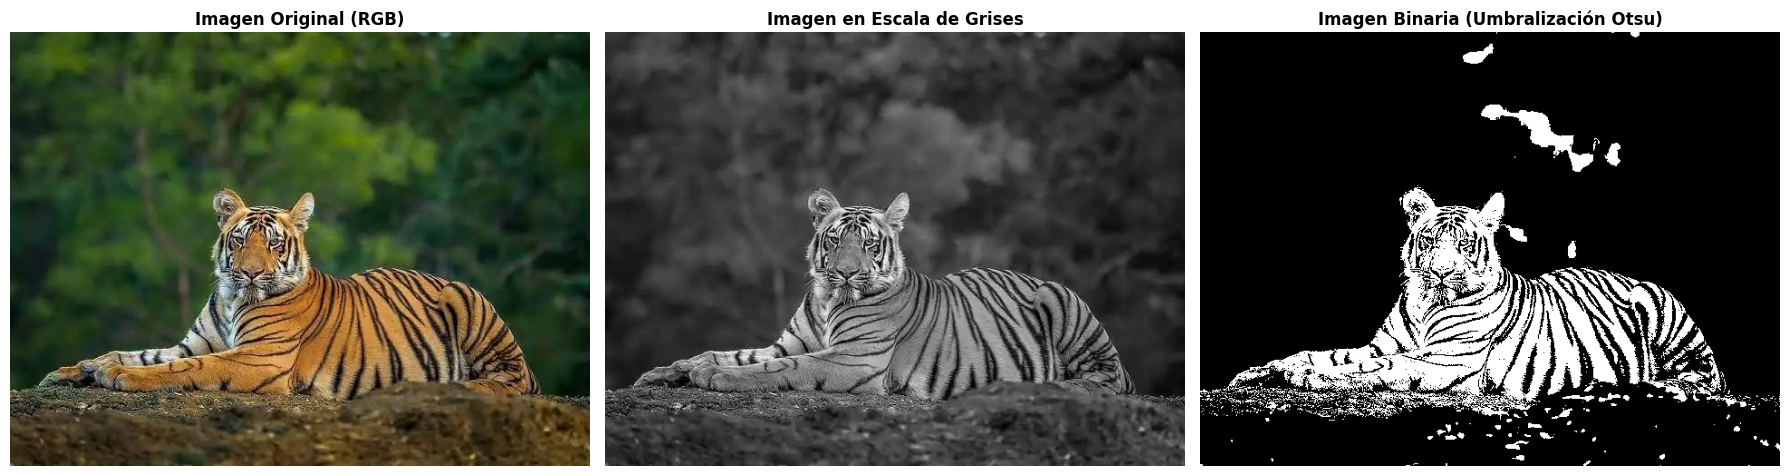

✓ Imagen convertida a escala de grises y binarizada


In [9]:
# Convertir a escala de grises
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar umbralización para obtener imagen binaria
# Usamos umbralización de Otsu para encontrar el umbral óptimo automáticamente
_, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar conversiones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original (RGB)', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title('Imagen en Escala de Grises', fontsize=12, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(img_binary, cmap='gray')
axes[2].set_title('Imagen Binaria (Umbralización Otsu)', fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Imagen convertida a escala de grises y binarizada")

### 5.1 Operación Morfológica: Erosión

La erosión reduce el tamaño de las regiones blancas (primer plano) y agranda las regiones negras (fondo).

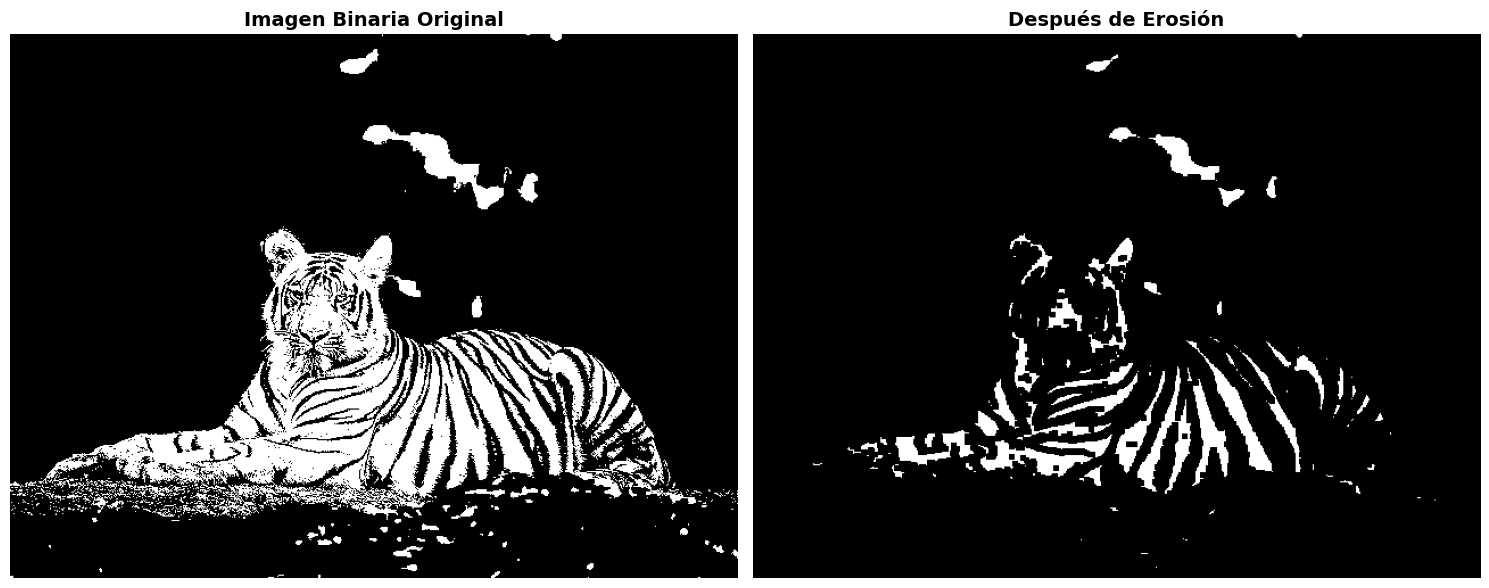

 Efecto de la Erosión:
La erosión reduce el tamaño de las regiones blancas (objetos en primer plano).
Elimina pequeños puntos de ruido y adelgaza los bordes de los objetos.
Es útil para eliminar detalles pequeños y separar objetos que están apenas conectados.
En esta imagen, las áreas blancas se vuelven más delgadas y algunos detalles pequeños desaparecen.


In [15]:
# Definir el kernel (elemento estructurante)
kernel = np.ones((5, 5), np.uint8)

# Aplicar erosión
img_erosion = cv2.erode(img_binary, kernel, iterations=1)

# Mostrar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(img_binary, cmap='gray')
axes[0].set_title('Imagen Binaria Original', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_erosion, cmap='gray')
axes[1].set_title('Después de Erosión', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(" Efecto de la Erosión:")
print("La erosión reduce el tamaño de las regiones blancas (objetos en primer plano).")
print("Elimina pequeños puntos de ruido y adelgaza los bordes de los objetos.")
print("Es útil para eliminar detalles pequeños y separar objetos que están apenas conectados.")
print("En esta imagen, las áreas blancas se vuelven más delgadas y algunos detalles pequeños desaparecen.")

### 5.2 Operación Morfológica: Dilatación

La dilatación expande el tamaño de las regiones blancas (primer plano) y reduce las regiones negras (fondo).

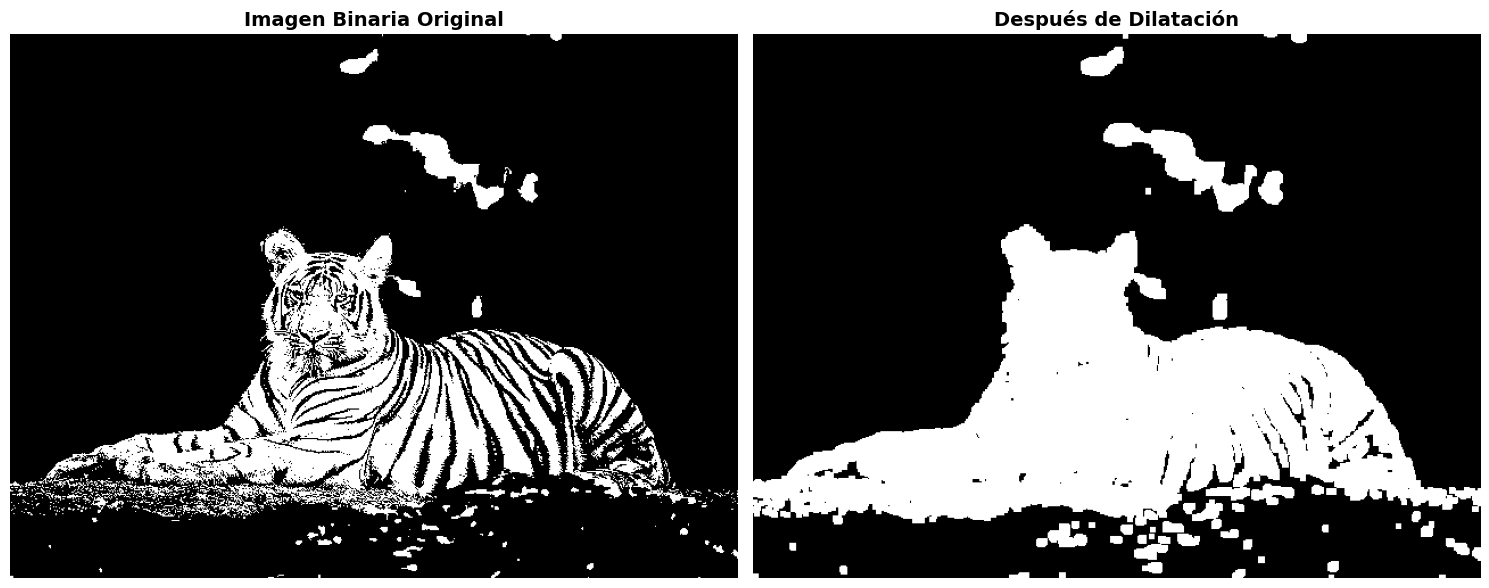

 Efecto de la Dilatación:
La dilatación expande el tamaño de las regiones blancas (objetos en primer plano).
Rellena pequeños agujeros y conecta regiones cercanas.
Es útil para unir partes fragmentadas de un objeto y rellenar huecos.
En esta imagen, las áreas blancas se vuelven más gruesas y los pequeños huecos se rellenan.


In [14]:
# Aplicar dilatación con el mismo kernel
img_dilation = cv2.dilate(img_binary, kernel, iterations=1)

# Mostrar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(img_binary, cmap='gray')
axes[0].set_title('Imagen Binaria Original', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_dilation, cmap='gray')
axes[1].set_title('Después de Dilatación', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(" Efecto de la Dilatación:")
print("La dilatación expande el tamaño de las regiones blancas (objetos en primer plano).")
print("Rellena pequeños agujeros y conecta regiones cercanas.")
print("Es útil para unir partes fragmentadas de un objeto y rellenar huecos.")
print("En esta imagen, las áreas blancas se vuelven más gruesas y los pequeños huecos se rellenan.")

## 6. Generación de Animación GIF

Creamos una animación GIF que muestra la secuencia de transformaciones aplicadas a la imagen.

In [16]:
# Preparar los frames para la animación
frames = []

# Función auxiliar para agregar texto a una imagen
def add_text_to_image(img, text, is_grayscale=False):
    # Crear una copia de la imagen
    if is_grayscale:
        img_with_text = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        img_with_text = img.copy()
    
    # Configurar el texto
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    thickness = 3
    color = (255, 255, 0)  # Amarillo en RGB
    
    # Obtener el tamaño del texto
    (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)
    
    # Posición del texto (centrado arriba)
    x = (img_with_text.shape[1] - text_width) // 2
    y = 50
    
    # Agregar fondo negro al texto para mejor visibilidad
    cv2.rectangle(img_with_text, (x-10, y-text_height-10), (x+text_width+10, y+10), (0, 0, 0), -1)
    
    # Agregar el texto
    cv2.putText(img_with_text, text, (x, y), font, font_scale, color, thickness)
    
    return img_with_text

# Frame 1: Imagen original
frame1 = add_text_to_image(img_rgb, "Original")
frames.append(Image.fromarray(frame1))

# Frame 2: Imagen suavizada
frame2 = add_text_to_image(img_blurred, "Suavizado")
frames.append(Image.fromarray(frame2))

# Frame 3: Detección de bordes (convertir a RGB para consistencia)
edges_rgb = cv2.cvtColor(img_edges, cv2.COLOR_GRAY2RGB)
frame3 = add_text_to_image(edges_rgb, "Bordes (Canny)")
frames.append(Image.fromarray(frame3))

# Frame 4: Imagen binaria
frame4 = add_text_to_image(img_binary, "Binarizada", is_grayscale=True)
frames.append(Image.fromarray(frame4))

# Frame 5: Erosión
frame5 = add_text_to_image(img_erosion, "Erosion", is_grayscale=True)
frames.append(Image.fromarray(frame5))

# Frame 6: Dilatación
frame6 = add_text_to_image(img_dilation, "Dilatacion", is_grayscale=True)
frames.append(Image.fromarray(frame6))

# Guardar como GIF
output_path = 'gifs/procesamiento_imagen.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    duration=1500,  # 1.5 segundos por frame
    loop=0  # Loop infinito
)

print(f"✓ GIF creado exitosamente: {output_path}")
print(f"  - Número de frames: {len(frames)}")
print(f"  - Duración por frame: 1.5 segundos")
print(f"  - Secuencia: Original → Suavizado → Bordes → Binaria → Erosión → Dilatación")

✓ GIF creado exitosamente: gifs/procesamiento_imagen.gif
  - Número de frames: 6
  - Duración por frame: 1.5 segundos
  - Secuencia: Original → Suavizado → Bordes → Binaria → Erosión → Dilatación


## 7. Resumen y Conclusiones

En este notebook hemos realizado un análisis completo de procesamiento de imágenes sobre una fotografía de un animal en vía de extinción:

### Operaciones Realizadas:

1. **Carga y visualización**: Imagen RGB del animal
2. **Filtro de suavizado**: Redujo el ruido y suavizó los detalles
3. **Detección de bordes**: Resaltó los contornos y características principales
4. **Análisis de canales RGB**: Identificamos qué estructuras se destacan en cada canal de color
5. **Binarización**: Convertimos la imagen a blanco y negro para operaciones morfológicas
6. **Erosión**: Adelgazó estructuras y eliminó ruido pequeño
7. **Dilatación**: Expandió estructuras y rellenó huecos
8. **Animación GIF**: Visualización secuencial de todas las transformaciones

### Aplicaciones Prácticas:

Estas técnicas son fundamentales en:
- **Conservación de especies**: Análisis de patrones de pelaje para identificación individual
- **Visión por computadora**: Detección y seguimiento de animales en videos
- **Investigación**: Estudio de características morfológicas
- **Educación**: Visualización de conceptos de procesamiento de imágenes